<a href="https://colab.research.google.com/github/saoter/AQM2023/blob/main/Data_Manipulation/data_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import re # to use Regular expressions
import matplotlib.pyplot as plt
import seaborn as sns


## Import and inspect dataset

In [93]:
url = 'https://raw.githubusercontent.com/saoter/AQM2023/main/Data_Manipulation/Salaries2.csv'
data = pd.read_csv(url)
# Drop columns that have 'Unnamed' in their name
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [94]:
data.dtypes

Job Title             object
Employment Type       object
Experience Level      object
Expertise Level       object
Company Location      object
Salary in USD          int64
Employee Residence    object
Company Size          object
Year                   int64
Salary_cur            object
distance to work      object
Addictions            object
dtype: object

In [95]:
data.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Company Location,Salary in USD,Employee Residence,Company Size,Year,Salary_cur,distance to work,Addictions
0,Data Engineer,Full-Time,Senior,Expert,United States,210000,United States,Medium,2023,210000 United States Dollar,67.9 kilometers,none
1,Data Engineer,Full-Time,Senior,Expert,United States,165000,United States,Medium,2023,165000 United States Dollar,32.3 kilometers,none
2,Data Engineer,Full-Time,Senior,Expert,United States,185900,United States,Medium,2023,185900 United States Dollar,100.1 kilometers,none
3,Data Engineer,Full-Time,Senior,Expert,United States,129300,United States,Medium,2023,129300 United States Dollar,53.4 kilometers,video games
4,Data Scientist,Full-Time,Senior,Expert,United States,140000,United States,Medium,2023,140000 United States Dollar,60.3 kilometers,none


## From string to numerical variable

Variable distance to work is a string, but we would like to have it as numeric (float). We can remove everything after the last number.

In [96]:
data['distance to work'] = data['distance to work'].apply(lambda x: float(re.findall(r'\d+\.\d+|\d+', x)[0]))


In [97]:
# now we can calculate with new variable, e.g., mean
print(data['distance to work'].mean())

60.05993939393939


## Split column to numeric and string columns

Column 'Salary_cur' has salary and the currency together as a string. If we want to use salary, we have to put it in float.

In [98]:
# Extract numeric values into 'Salary'
data['Salary'] = data['Salary_cur'].str.extract('(\d+(\.\d+)?)')[0]

# Convert 'Salary' to numeric
data['Salary'] = pd.to_numeric(data['Salary'], errors='coerce')

# Extract non-numeric values into 'Salary Currency'
data['Salary Currency'] = data['Salary_cur'].str.extract('(\D+)')[0]

# Remove the old variable Salary_cur
data.drop('Salary_cur', axis = 1)

,Job Title,Employment Type,Experience Level,Expertise Level,Company Location,Salary in USD,Employee Residence,Company Size,Year,distance to work,Addictions,Salary,Salary Currency
0,Data Engineer,Full-Time,Senior,Expert,United States,210000,United States,Medium,2023,67.9,none,210000,United States Dollar
1,Data Engineer,Full-Time,Senior,Expert,United States,165000,United States,Medium,2023,32.3,none,165000,United States Dollar
2,Data Engineer,Full-Time,Senior,Expert,United States,185900,United States,Medium,2023,100.1,none,185900,United States Dollar
3,Data Engineer,Full-Time,Senior,Expert,United States,129300,United States,Medium,2023,53.4,video games,129300,United States Dollar
4,Data Scientist,Full-Time,Senior,Expert,United States,140000,United States,Medium,2023,60.3,none,140000,United States Dollar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,Data Scientist,Full-Time,Senior,Expert,United States,412000,United States,Large,2020,85.3,none,412000,United States Dollar
3296,Principal Data Scientist,Full-Time,Mid,Intermediate,United States,151000,United States,Large,2021,52.8,none,151000,United States Dollar
3297,Data Scientist,Full-Time,Entry,Junior,United States,105000,United States,Small,2020,2.3,none,105000,United States Dollar
3298,Business Data Analyst,Contract,Entry,Junior,United States,100000,United States,Large,2020,24.3,none,100000,United States Dollar


## Creating new variable by recoding

We have variable 'Company Location' with the following distribution of values.

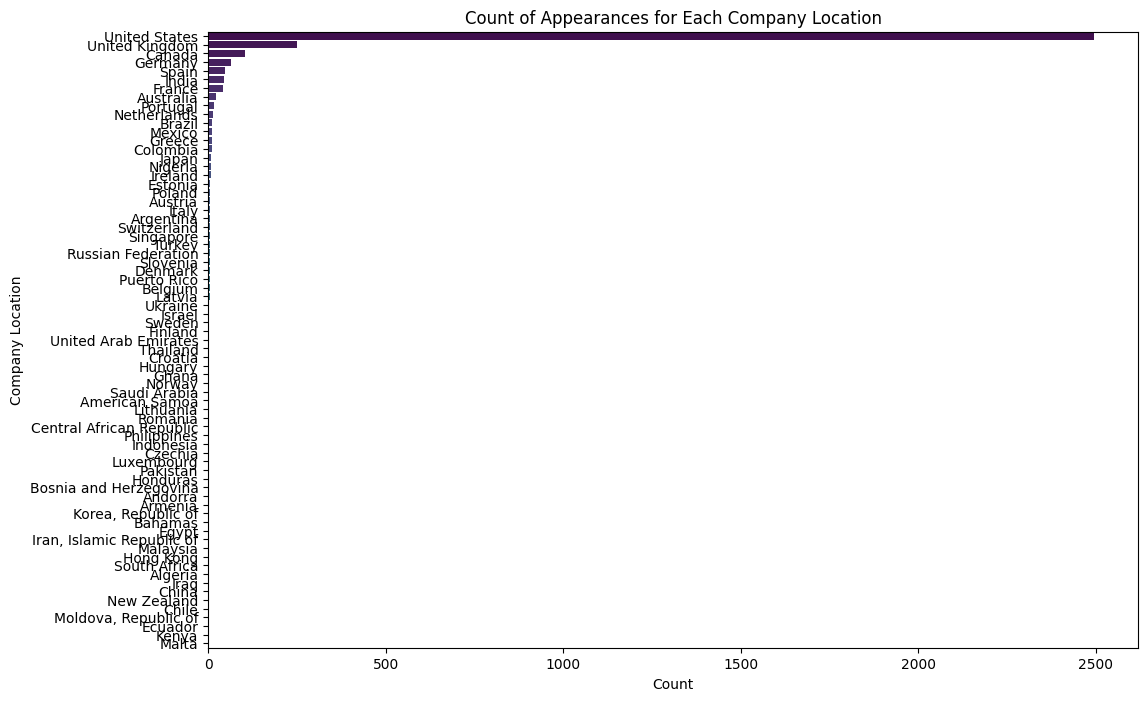

In [99]:
# Count appearances of each location
location_counts = data['Company Location'].value_counts()

# Sort locations by count
sorted_locations = location_counts.sort_values(ascending=False)

# Plot the counts
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_locations.values, y=sorted_locations.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Company Location')
plt.title('Count of Appearances for Each Company Location')
plt.show()

We can see that we have one dominant value, a few with a few hundred apperances and many with only a few. We can recode them, so every country with less than 100 (arbitrary decision) datapoints will became 'Others'

In [100]:

# Count appearances of each location
location_counts = data['Company Location'].value_counts()

# Create a new variable 'location_new' based on distribution count
threshold = 100
data['location_new'] = data['Company Location'].apply(lambda x: x if location_counts[x] >= threshold else 'Others')

# Count appearances of each location in the new variable
location_new_counts = data['location_new'].value_counts()

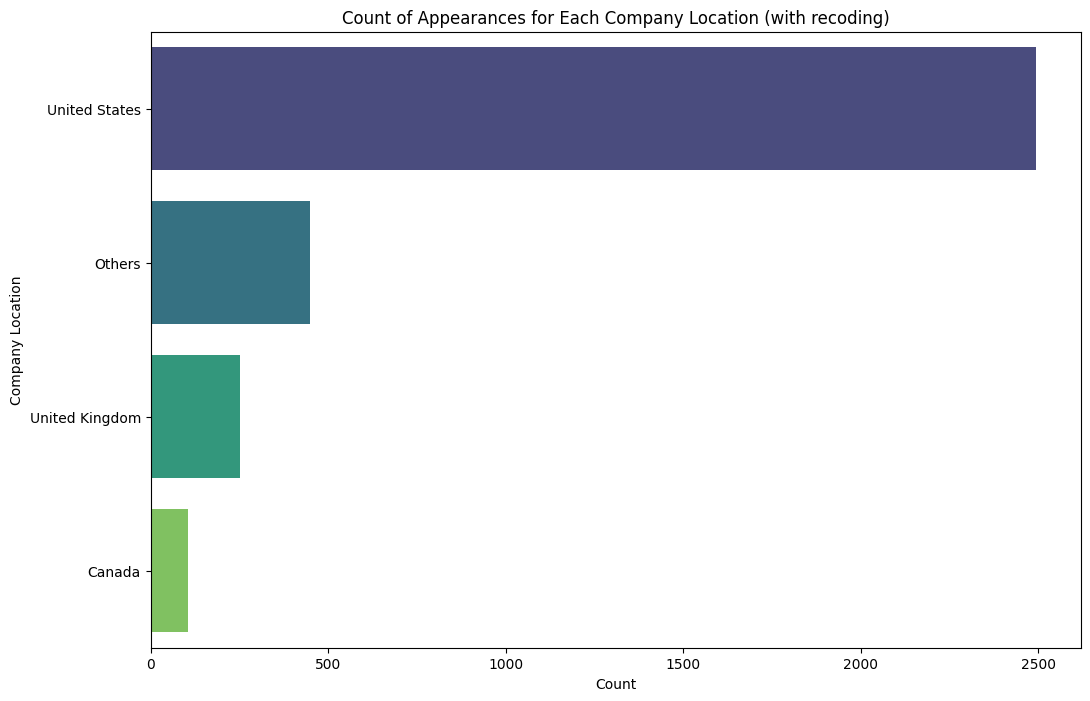

In [101]:
# Plot the counts
plt.figure(figsize=(12, 8))
sns.barplot(x=location_new_counts.values, y=location_new_counts.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Company Location')
plt.title('Count of Appearances for Each Company Location (with recoding)')
plt.show()


## Changing string variables to categorical (ordered)

We have variables 'Company Size' which has the following distinct values:

In [102]:
data['Company Size'].unique()

array(['Medium', 'Large', 'Small'], dtype=object)

In [103]:
# Define the order
size_order = CategoricalDtype(categories=["Small", "Medium", "Large"], ordered=True)

# Convert the 'Size' column to ordered categorical
data['Company Size'] = data['Company Size'].astype(size_order)

In [104]:
# Now the output shows as also the relation between values
data['Company Size'].unique()

['Medium', 'Large', 'Small']
Categories (3, object): ['Small' < 'Medium' < 'Large']

## Changing string variables to categorical (not ordered)

We have variable 'Addictions', which is not necessarily ordered. Here are all different values with counts:

In [105]:
data['Addictions'].value_counts()

none           2639
manga           349
video games     312
Name: Addictions, dtype: int64

In [106]:
# We change it to categorical value without ordering
data['Addictions'] = data['Addictions'].astype('category')


In [107]:
data.dtypes

Job Title               object
Employment Type         object
Experience Level        object
Expertise Level         object
Company Location        object
Salary in USD            int64
Employee Residence      object
Company Size          category
Year                     int64
Salary_cur              object
distance to work       float64
Addictions            category
Salary                   int64
Salary Currency         object
location_new            object
dtype: object

In [108]:
data.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Company Location,Salary in USD,Employee Residence,Company Size,Year,Salary_cur,distance to work,Addictions,Salary,Salary Currency,location_new
0,Data Engineer,Full-Time,Senior,Expert,United States,210000,United States,Medium,2023,210000 United States Dollar,67.9,none,210000,United States Dollar,United States
1,Data Engineer,Full-Time,Senior,Expert,United States,165000,United States,Medium,2023,165000 United States Dollar,32.3,none,165000,United States Dollar,United States
2,Data Engineer,Full-Time,Senior,Expert,United States,185900,United States,Medium,2023,185900 United States Dollar,100.1,none,185900,United States Dollar,United States
3,Data Engineer,Full-Time,Senior,Expert,United States,129300,United States,Medium,2023,129300 United States Dollar,53.4,video games,129300,United States Dollar,United States
4,Data Scientist,Full-Time,Senior,Expert,United States,140000,United States,Medium,2023,140000 United States Dollar,60.3,none,140000,United States Dollar,United States


## Creating dummy variables for categorical values

NOTE: This step is important for the coming lectures on Regression

IF we want to use linear or logistic regresion, all input data needs to be numerical. Thus, we create dummy variables for each unique value and we always delete one of them. As a result, we have multiple new columns with 0s and 1s.



In [109]:
# Convert categorical variables to dummy variables
company_size_dummies = pd.get_dummies(data, columns=['Company Size'], drop_first=True)

company_size_dummies.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Company Location,Salary in USD,Employee Residence,Year,Salary_cur,distance to work,Addictions,Salary,Salary Currency,location_new,Company Size_Medium,Company Size_Large
0,Data Engineer,Full-Time,Senior,Expert,United States,210000,United States,2023,210000 United States Dollar,67.9,none,210000,United States Dollar,United States,1,0
1,Data Engineer,Full-Time,Senior,Expert,United States,165000,United States,2023,165000 United States Dollar,32.3,none,165000,United States Dollar,United States,1,0
2,Data Engineer,Full-Time,Senior,Expert,United States,185900,United States,2023,185900 United States Dollar,100.1,none,185900,United States Dollar,United States,1,0
3,Data Engineer,Full-Time,Senior,Expert,United States,129300,United States,2023,129300 United States Dollar,53.4,video games,129300,United States Dollar,United States,1,0
4,Data Scientist,Full-Time,Senior,Expert,United States,140000,United States,2023,140000 United States Dollar,60.3,none,140000,United States Dollar,United States,1,0


We can observe that we have two new columns: 'Company Size_Medium', 'Company Size_Large'. We don't need 'Company Size_Small', as they are already represented in a case when both 'Company Size_Medium', 'Company Size_Large' has value 0.